<a href="https://colab.research.google.com/github/dgsob/5BD001/blob/main/SA_THE.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Survival Analysis with Applications in Medicine: Take-home examination

## A. Weibull regression models (3 marks)

### 1. For a proportional hazards model with $S_0(t)$ that is a Weibull distribution, show that survival $S(t)$ is also from a Weibull distribution. Marks: 1 for a correct answer; 0.5 for a minor error; otherwise 0.

For a proportional hazards model, we have:
$$S(t|x) = S_0(t)^{\exp(\beta x)}$$

Where $$S_0(t) = \exp(-\lambda t^k)$$ is the Weibull baseline survival function.

Let's substitute:
$$S(t|x) = [\exp(-\lambda t^k)]^{\exp(\beta x)} = \exp(-\lambda t^k \cdot \exp(\beta x))$$

This can be written as:
$$S(t|x) = \exp(-\lambda \cdot \exp(\beta x) \cdot t^k)$$

This is still a Weibull distribution with parameter:
$$\lambda' = \lambda \cdot \exp(\beta x)$$

So survival $S(t)$ is indeed from a Weibull distribution.

### 2. For an accelerated failure time model with $S_0(t)$ that is a Weibull distribution, show that survival $S(t)$ is also from a Weibull distribution. Marks: 1 for a correct answer; 0.5 for a minor error; otherwise 0.

For an accelerated failure time (AFT) model, we have:
$$S(t|x) = S_0(t \exp(-\tilde{\beta}x))$$

Where $$S_0(t) = \exp(-\lambda t^k)$$ is the Weibull baseline survival function.

Let's substitute:
$$S(t|x) = \exp(-\lambda[t \exp(-\tilde{\beta}x)]^k)$$
$$S(t|x) = \exp(-\lambda t^k \exp(-k\tilde{\beta}x))$$

This can be written as:
$$S(t|x) = \exp(-\lambda \exp(-k\tilde{\beta}x) \cdot t^k)$$

This is still a Weibull distribution with parameter:
$$\lambda' = \lambda\exp(-k\tilde{\beta}x)$$
So this survival $S(t)$ is also from a Weibull distribution.

### 3. What is the relationship between $β$ and $\tilde{\beta}$ if both models have a Weibull baseline survival function? Marks: 1 for a correct answer; 0.5 for a minor error; otherwise 0.

From our derivations above:

In the proportional hazards model, the scale parameter is:
$\lambda' = \lambda \exp(\beta x)$

In the accelerated failure time model, the scale parameter becomes:
$\lambda' = \lambda\exp(-k\tilde{\beta}x)$

For these to be equivalent models (since they both result in Weibull distributions):
$\lambda \exp(\beta x) = \lambda \exp(-k\tilde{\beta}x)$

Then:
$\exp(\beta x) = \exp(-k\tilde{\beta}x)$ $→$
$\beta x = -k\tilde{\beta}x$

Thus: $\beta = -k\tilde{\beta}$

## B: Interval-censored likelihood (3 marks)

### 1. Assume that we have a data tuple $(t_i, u_i, v_i)$ where $t_i$ is the delayed entry (left truncation) time and an event is observed in the interval $(u_i, v_i]$ for individual $i$. Express the log-likelihood for this data tuple in terms of (a) survival $S(t)$ and (b) the hazard $h(t)$ at time $t$. Marks for (a) and for (b): 1 for a correct answer; 0.5 for a minor error; otherwise 0.

(a)    
For left-truncated interval-censored data:

$$P(u_i < T_i \leq v_i|T_i > t_i) = \frac{P(u_i < T_i \leq v_i \cap T_i > t_i)}{P(T_i > t_i)} = \frac{P(u_i < T_i \leq v_i)}{P(T_i > t_i)}$$

Since $u_i \geq t_i$ (the observation window starts after the truncation time), we can write:

$$P(u_i < T_i \leq v_i|T_i > t_i) = \frac{S(u_i) - S(v_i)}{S(t_i)}$$

Taking the logarithm for the log-likelihood:

$$\log L_i = \log[S(u_i) - S(v_i)] - \log(S(t_i))$$

(b)    
We know that the survival function can be derived from hazard function:

$$S(t) = \exp \left(- \int_0^t h(s)ds \right)$$

Thus:

$$S(u_i) = \exp \left(- \int_0^{u_i} h(s)ds \right)$$

$$S(v_i) = \exp \left(- \int_0^{v_i} h(s)ds \right)$$

$$S(t_i) = \exp \left(- \int_0^{t_i} h(s)ds \right)$$

For $S(v_i)$ we can do:
$$S(v_i) = \exp \left(- \int_0^{u_i} h(s)ds - \int_{u_i}^{v_i} h(s)ds \right) = S(u_i) \cdot \exp \left(- \int_{u_i}^{v_i} h(s)ds \right)$$

Then substitute it to the result of (a) and factor the $S(u_i)$ out:
$$\log L_i = \log \left( S(u_i) - S(u_i) \cdot \exp \left(- \int_{u_i}^{v_i} h(s)ds \right) \right) - \log(S(t_i))$$

$$\log L_i = \log \left( S(u_i) \cdot \left( 1 - \exp \left(- \int_{u_i}^{v_i} h(s)ds \right) \right) \right) - \log(S(t_i))$$

$$\log L_i = \log(S(u_i)) + \log \left( 1 - \exp \left(- \int_{u_i}^{v_i} h(s)ds \right) \right) - \log(S(t_i))$$

Now we substitute the $S(u_i)$ and the $S(t_i)$ accordingly:
$$\log L_i = - \int_0^{u_i} h(s)ds + \log \left( 1 - \exp \left(- \int_{u_i}^{v_i} h(s)ds \right) \right) + \int_0^{t_i} h(s)ds$$

Since $t_i$ ≤ $u_i$, the above should result in:
$$\log L_i = \log \left( 1 - \exp \left(- \int_{u_i}^{v_i} h(s)ds \right) \right) - \int_{t_i}^{u_i} h(s)ds$$

### 2. Can you express these data using the Surv function from the survival package? If so, show an example; if not, explain why.

It can be implicitly expressed like this:

In [ ]:
library(survival)

# Example data frame
data <- data.frame(
  id = 1:5,
  t = c(5, 5, 5, 5, 5),      # Left truncation times
  u = c(13, 5, 13, 13, 13),  # Lower interval bounds
  v = c(18, 5, 538, 13, Inf) # Upper interval bounds
)

# For interval-censored data, we need to specify a status/event indicator
# From https://www.rdocumentation.org/packages/survival/versions/2.11-4/topics/Surv:
# 0 = right censored ------> when v = Inf (event not observed)
# 1 = event at time -------> when u = v (the exact time of the event is known)
# 2 = left censored -------> when u = 0 or u = t (event started before we checked for the first time)
# 3 = interval censored ---> when u < v (sort of typical case)
status <- rep(3, nrow(data))
status[data$v == Inf] <- 0
status[data$u == data$v] <- 1
status[data$u == data$t] <- 2

# Create the interval-censored Surv object
surv_obj <- with(data, Surv(time = u, time2 = v, event = status, type = "interval"))

# Display the Surv object
print(surv_obj)

# Then when using in a model,
# we would include left truncation with a subset parameter:
# model <- coxph(surv_obj ~ predictors, data = data, subset = (t < u))

[1] [13,  18]  5-       [13, 538] 13        13+      


## C: Truncated distributions (7 marks)

### 1. Express the survival function for the truncated distribution in terms of the survival function for $T$. Mark: 1 for correct answer; 0.5 for minor error; otherwise 0.

From the definition of conditional probability:
$$
P(T > t|T > t_0) = \frac{P(T > t \cap T > t_0)}{P(T > t_0)}
$$     

Since $t \geq t_0$, $P(T > t \cap T > t_0) = P(T > t)$, then we have:
$$
P(T > t|T > t_0) = \frac{P(T > t)}{P(T > t_0)} = \frac{S(t)}{S(t_0)}
$$                           

Thus, the survival function for the truncated distribution in terms of $S(t)$ is:     
$$
S_{t_0}(t) = \frac{S(t)}{S(t_0)} \text{ for } t \geq t_0
$$

### 2. For the truncated distribution, what is the quantile function $Q(p|t_0)$ that solves $P(T > t|T > t_0) = 1 - p$ for $t$ in terms of the survival and quantile functions for $T$ at quantile (probability) $p$? Marks: 2 for correct answer; 1.5 for very minor error; 1 for minor error; 0.5 for major error but correct approach; otherwise 0.

We have:
$$
P(T > t|T > t_0) = 1 - p
$$            

From question 1:
$$
\frac{S(t)}{S(t_0)} = 1 - p
$$

$$
S(t) = (1 - p) \cdot S(t_0)
$$

The quantile function $Q(p)$ is defined as $S(Q(p))=1−p$.         
If we call the quantile function for the truncated distribution $Q(p|t_0)$, then we can write:
$$
S(Q(p|t_0)) = (1 - p) \cdot S(t_0)
$$

$$
Q(p|t_0) = S^{-1}((1 - p) \cdot S(t_0))
$$

Recall that $S^{-1}(1 - p) = Q(p)$ for the original distribution. If we define $p' = 1 - (1 - p) \cdot S(t_0)$, then:
$$
S^{-1}((1 - p) \cdot S(t_0)) = S^{-1}(1 - p')
$$

This gives:
$$Q(p|t_0) = Q(p')$$

Where:
$$
p' = 1 - S(t_0) + p \cdot S(t_0)
$$          

Thus, the quantile function for the truncated distribution is:    
$$Q(p|t_0) = Q(1 - S(t_0) + p \cdot S(t_0))$$

### 3. Using this algorithm, write, run and report on R code to calculate the 0.4 quantile...

In [ ]:
# Parameters for log-normal distribution
mu <- 1
sigma <- 1.2
t0 <- 2
p <- 0.4

# Calculate S(t0) - survival function at truncation point
# For log-normal: S(t0) = 1 - P(T ≤ t0) = 1 - plnorm(t0, meanlog, sdlog)
S_t0 <- 1 - plnorm(t0, meanlog = mu, sdlog = sigma)

# Calculate adjusted probability for the quantile function
p_adjusted <- p * S_t0 + (1 - S_t0)

# Calculate the 0.4 quantile of the truncated distribution
quantile_truncated <- qlnorm(p_adjusted, meanlog = mu, sdlog = sigma)

# Print result
cat("Survival probability at t0 =", t0, "is S(t0) =", S_t0, "\n")
cat("Adjusted probability for quantile function =", p_adjusted, "\n")
cat("0.4 quantile of the truncated log-normal distribution =", quantile_truncated, "\n")

Survival probability at t0 = 2 is S(t0) = 0.6009129 
Adjusted probability for quantile function = 0.6394523 
0.4 quantile of the truncated log-normal distribution = 4.171994 


This result indicates that:
- 60% of values in the original distribution are greater than 2
- when adjusted for truncation it's 64%
- 40% of the values in the truncated distribution (where all values are ≥ 2) are less than or equal to approximately 4.17.

### 4. Use this R code to check your value of the 0.4 quantile from the truncated log-normal distribution in question C3

In [ ]:
# Function to generate samples from truncated log-normal distribution
rtrunc_lnorm <- function(n, meanlog, sdlog, t0) {
  y = rlnorm(n, meanlog, sdlog)
  while (any(y < t0)) {
    y[y < t0] = rlnorm(sum(y < t0), meanlog, sdlog)
  }
  y
}

# Generate a large sample from the truncated distribution
set.seed(358)
samples <- rtrunc_lnorm(10^5, mu, sigma, t0)

# Calculate the 0.4 quantile from the samples
quantile_empirical <- quantile(samples, 0.4)

# Print result
cat("0.4 quantile from sampling =", quantile_empirical, "\n")
cat("Analytical 0.4 quantile =", quantile_truncated, "\n")

0.4 quantile from sampling = 4.170262 
Analytical 0.4 quantile = 4.171994 


The values are reasonably close.

## D: Cox’s partial likelihood with a time-varying effects (6 marks)

### 1. Let the right censored data tuple...

We have:    
* For each individual $i \in \{1, ..., n\}$, we have the tuple $(t_i, \delta_i, x_i(\cdot))$

* $t_i$ is the follow-up time (from $0$ to $t_i$)

* $\delta_i$ is the event indicator (1 if event observed at time $t_i$, $0$ if censored)

* $x_i(t)$ represents the time-varying covariates

* The time-varying hazard ratio is $\exp(x_i(t)^T\beta)$

* $R(t_i)$ is the risk set at time $t_i$, defined as individuals set $\{j: t_j \geq t_i\}$

* No tied event times are assumed

The partial likelihood function for Cox's model with time-varying effects is:    
$$
L(\boldsymbol{\beta}) = \prod_{i=1}^{n} \left[ \frac{\exp(\mathbf{x}_i(t_i)^T \boldsymbol{\beta})}{\sum_{j \in R(t_i)} \exp(\mathbf{x}_j(t_i)^T \boldsymbol{\beta})} \right]^{\delta_i}
$$

This means:  
- we only consider terms for individuals who experienced the event $(\delta_i = 1)$

- for each event time, we compute the ratio of the hazard for the individual experiencing the event to the sum of hazards for all individuals still at risk

- the time-varying covariates are evaluated at the specific event time $t_i$

- the product is taken over all individuals

The key difference from the standard Cox model is that covariates are evaluated at the specific time points rather than being constant.

### 2. Analytically derive the gradient (or score) $\frac{d\log(L)}{d\beta_k}$.

We will use the $L = L(\boldsymbol{\beta})$ from question 1. Taking the logarithm we'll get the log-likelihood:    
$$
\log(L(\boldsymbol{\beta})) = \sum_{i=1}^{n} \delta_i \left[ \mathbf{x}_i(t_i)^T \boldsymbol{\beta} - \log \left( \sum_{j \in R(t_i)} \exp(\mathbf{x}_j(t_i)^T \boldsymbol{\beta}) \right) \right]
$$

Then the deriviative:
$$
\frac{d\log(L)}{d\beta_k} = \sum_{i=1}^{n} \delta_i \left[ x_{ik}(t_i) - \frac{d}{d\beta_k}\log \left( \sum_{j \in R(t_i)} \exp(\mathbf{x}_j(t_i)^T \boldsymbol{\beta}) \right) \right]
$$
   
For the second term in the bracket, if we denote $S_i = \sum_{j \in R(t_i)} \exp(\mathbf{x}_j(t_i)^T \boldsymbol{\beta})$, then from the chain rule:           

$$
\frac{d}{d\beta_k}\log(S_i) = \frac{1}{S_i} \cdot \frac{dS_i}{d\beta_k}
$$

Now we are looking for $\frac{dS_i}{d\beta_k}$:
$$
\frac{dS_i}{d\beta_k} = \frac{d}{d\beta_k}\left(\sum_{j \in R(t_i)} \exp(\mathbf{x}_j(t_i)^T \boldsymbol{\beta})\right) = \sum_{j \in R(t_i)} \frac{d}{d\beta_k}\exp(\mathbf{x}_j(t_i)^T \boldsymbol{\beta})
$$

Inside the sum we have:
$$
\frac{d}{d\beta_k}\exp(\mathbf{x}_j(t_i)^T \boldsymbol{\beta}) = \exp(\mathbf{x}_j(t_i)^T \boldsymbol{\beta}) \cdot \frac{d}{d\beta_k}(\mathbf{x}_j(t_i)^T \boldsymbol{\beta}) = x_{jk}(t_i) \cdot \exp(\mathbf{x}_j(t_i)^T \boldsymbol{\beta})
$$

Then by substituting back we get the $\frac{dS_i}{d\beta_k}$ as:
$$
\frac{dS_i}{d\beta_k} = \sum_{j \in R(t_i)} x_{jk}(t_i) \cdot \exp(\mathbf{x}_j(t_i)^T \boldsymbol{\beta})
$$

Now by substituting the whole subcalculation back, we can write the second term in the bracket as:
$$
\frac{d}{d\beta_k}\log(S_i) = \frac{1}{S_i} \cdot \sum_{j \in R(t_i)} x_{jk}(t_i) \cdot \exp(\mathbf{x}_j(t_i)^T \boldsymbol{\beta}) = \frac{\sum_{j \in R(t_i)} x_{jk}(t_i) \cdot \exp(\mathbf{x}_j(t_i)^T \boldsymbol{\beta})}{\sum_{j \in R(t_i)} \exp(\mathbf{x}_j(t_i)^T \boldsymbol{\beta})}
$$

Which finally gives:
$$
\frac{d\log(L)}{d\beta_k} = \sum_{i=1}^{n} \delta_i \left[ x_{ik}(t_i) - \frac{\sum_{j \in R(t_i)} x_{jk}(t_i) \exp(\mathbf{x}_j(t_i)^T \boldsymbol{\beta})}{\sum_{j \in R(t_i)} \exp(\mathbf{x}_j(t_i)^T \boldsymbol{\beta})} \right],
$$
where $x_{ik}(t_i)$ represents the $k$-th component of the time-varying covariate vector $\mathbf{x}_i(t_i)$ evaluated at time $t_i$.     
Similarily $x_{jk}(t_i)$ for $\mathbf{x}_j(t_i)$.     

The term inside the brackets can be interpreted as the difference between the covariate value for individual $i$ experiencing an event and the weighted average of the covariate values for all individuals at risk at time $t_i$, where the weights are the hazard ratios.



### 3. Let a binary exposure be defined by...

For an individual with exposure $(z_i=1)$, the covariate vector is:
$$
\mathbf{x}_i(t) = (1, t)^T
$$

For an individual without exposure $(z_i=0)$, the covariate vector is:
$$
\mathbf{x}_i(t) = (0, 0)^T
$$

Then, the hazard ratio comparing exposed to unexposed individuals at time $t$ is:
$$
\frac{\lambda(t | z_i = 1)}{\lambda(t | z_i = 0)} = \frac{\lambda_0(t) \exp((1, t)^T \boldsymbol{\beta})}{\lambda_0(t) \exp((0, 0)^T \boldsymbol{\beta})} = \frac{\exp(\beta_1 + \beta_2 t)}{\exp(0)} = \exp(\beta_1 + \beta_2 t),
$$        
where $\lambda_0(t)$ was the baseline hazard function.

### 4. The following code is used to investigate whether the hazard ratio...

In [ ]:
if (!requireNamespace("biostat3", quietly = TRUE)) {
  install.packages("biostat3", lib = "/usr/local/lib/R/site-library")
}

In [ ]:
library(survival)
library(biostat3)
transform(biostat3::colon, stage=relevel(stage,"Localised")) |>
    coxph(Surv(surv_mm,status=="Dead: cancer")~stage+tt(stage), data=_,
          tt=function(x,t,...) (x=="Distant")*t/12) |>
    summary()

Loading required package: MASS


Attaching package: ‘biostat3’


The following object is masked from ‘package:survival’:

    colon




Call:
coxph(formula = Surv(surv_mm, status == "Dead: cancer") ~ stage + 
    tt(stage), data = transform(biostat3::colon, stage = relevel(stage, 
    "Localised")), tt = function(x, t, ...) (x == "Distant") * 
    t/12)

  n= 15564, number of events= 8369 

                  coef exp(coef) se(coef)      z Pr(>|z|)    
stageUnknown   0.93904   2.55753  0.03777 24.865  < 2e-16 ***
stageRegional  0.80311   2.23248  0.04105 19.566  < 2e-16 ***
stageDistant   2.21903   9.19837  0.03561 62.321  < 2e-16 ***
tt(stage)     -0.12347   0.88385  0.01551 -7.959 1.73e-15 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

              exp(coef) exp(-coef) lower .95 upper .95
stageUnknown     2.5575     0.3910    2.3751    2.7540
stageRegional    2.2325     0.4479    2.0599    2.4195
stageDistant     9.1984     0.1087    8.5783    9.8632
tt(stage)        0.8839     1.1314    0.8574    0.9111

Concordance= 0.727  (se = 0.003 )
Likelihood ratio test= 5849  on 4 df,   p=<2e-16
Wald 

The regression model is:

In [ ]:
# coxph(Surv(surv_mm, status=="Dead: cancer") ~ stage + tt(stage),
#       data=transform(biostat3::colon, stage=relevel(stage,"Localised")),
#       tt=function(x,t,...) (x=="Distant")*t/12)

This translates to, for example:
$$
\lambda(t|s) = \lambda_0(t) \exp\left(\beta_1 I(s = \text{Unknown}) + \beta_2 I(s = \text{Regional}) + \beta_3 I(s = \text{Distant}) + \beta_4 I(s = \text{Distant}) \times \frac{t}{12}\right),
$$

where:
- $\lambda_0(t)$ is the hazard function for patients with localized cancer (reference level),
- $I(\cdot)$ is an indicator function,
- $\beta_1$, $\beta_2$, $\beta_3$ represent the log hazard ratios for Unknown, Regional, and Distant stages compared to Localized stage at $t=0$,
- $\beta_4$ represents how the log hazard ratio for Distant (vs. Localized) cancer changes per year of follow-up,
- $\frac{t}{12}$ converts time from months to years.




The four parameters are:
1. stageUnknown (coefficient: $0.93904$) with hazard ratio 2.5575
2. stageRegional (coefficient: $0.80311$) with hazard ratio 2.2325
3. stageDistant (coefficient: $2.21903$) with hazard ratio 9.1984
4. tt(stage) (coefficient: $-0.12347$) with hazard ration 0.8839

Interpretation:      
- At baseline $(t=0)$:
    1. Patients with unknown cancer stage have 2.56 times higher hazard of cancer death compared to those with localized cancer.
    2. Patients with regional cancer stage have 2.23 times higher hazard of cancer death compared to those with localized cancer.
    3. Patients with distant cancer stage have 9.20 times higher hazard of cancer death compared to those with localized cancer.
- The effect of distant cancer, compared to localized, changes over time. Namely the hazard ratio for distant vs. localized cancer decreases by a factor of 0.88 per year (parameter 4).
- All results are statistically significant.

## E: Data analysis of a randomised controlled trial for hormonal treatment of breast cancer patients in Germany (9 marks)

### 1. Plot the Kaplan-Meier curves by randomisation arm, including a legend and appropriate axis labels. Carefully describe the pattern. Marks: 2 for a complete description of the pattern; 1 for a partial description of the pattern; otherwise 0.

In [ ]:
if (!requireNamespace("rstpm2", quietly = TRUE)) {
  install.packages("rstpm2", lib = "/usr/local/lib/R/site-library")
}

also installing the dependencies ‘numDeriv’, ‘bdsmatrix’, ‘bbmle’, ‘fastGHQuad’, ‘mvtnorm’, ‘RcppArmadillo’, ‘BH’




In [ ]:
library(rstpm2)
library(survival)
library(ggplot2)

Loading required package: splines


Attaching package: ‘rstpm2’


The following objects are masked from ‘package:biostat3’:

    colon, eform, popmort


The following object is masked from ‘package:survival’:

    colon




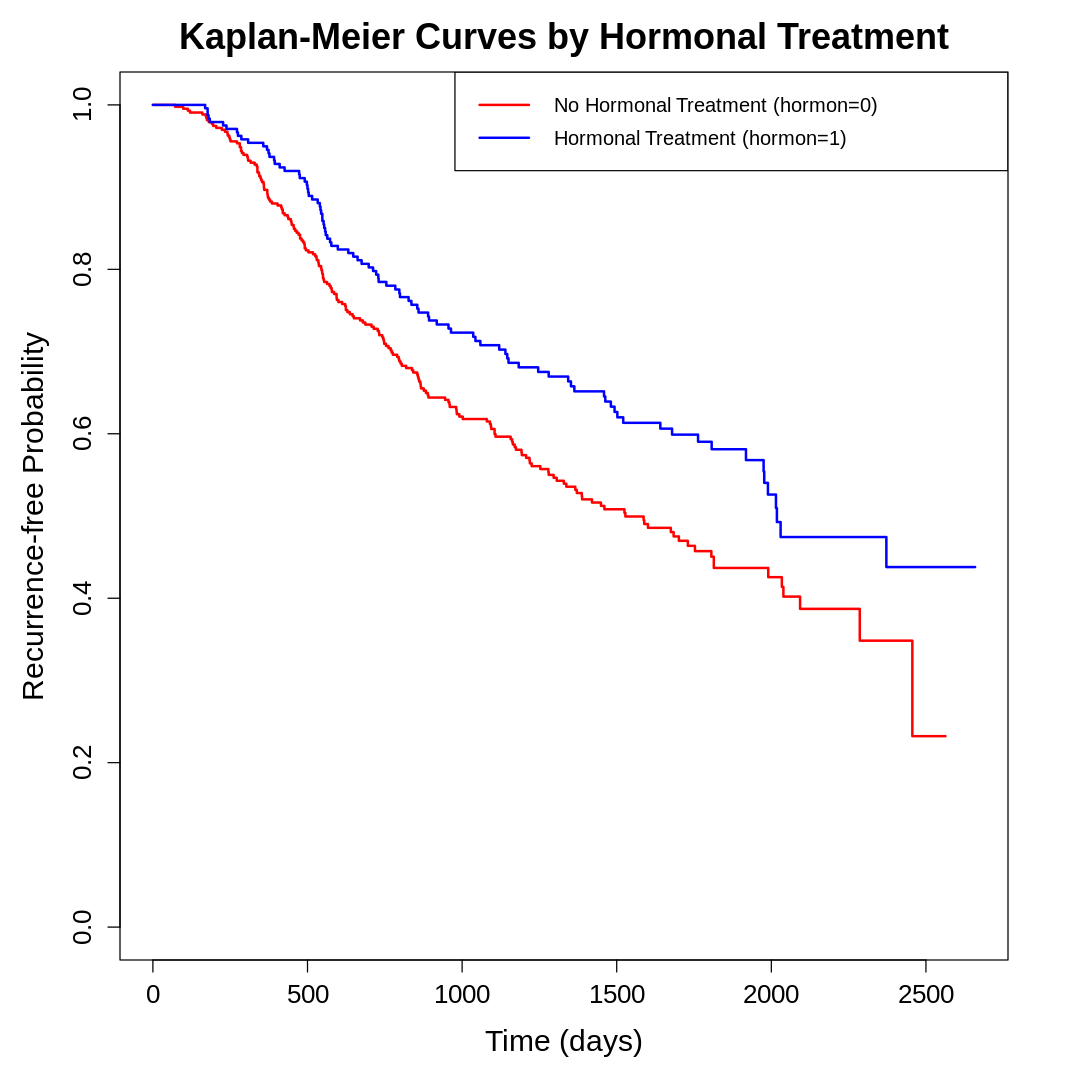

In [ ]:
# Load the dataset
data(brcancer, package = "rstpm2")

# Create a survival object
surv_obj <- Surv(brcancer$rectime, brcancer$censrec == 1)

# Fit the Kaplan-Meier model by treatment group
km_fit <- survfit(surv_obj ~ hormon, data = brcancer)

# Plot size controls
options(repr.plot.width=9, repr.plot.height=9)
par(mar = c(5, 5, 3, 3), cex.main = 1.8, cex.lab = 1.5, cex.axis = 1.3, fig = c(0, 1, 0, 1))

# Plot the Kaplan-Meier curves
plot(km_fit,
     xlab = "Time (days)",
     ylab = "Recurrence-free Probability",
     col = c("red", "blue"),
     lwd = 2,
     main = "Kaplan-Meier Curves by Hormonal Treatment")

# Add a legend
legend("topright",
       legend = c("No Hormonal Treatment (hormon=0)", "Hormonal Treatment (hormon=1)"),
       col = c("red", "blue"),
       lwd = 2)

Description of the pattern:

The Kaplan-Meier curves show the recurrence-free probability over time for breast cancer patients, comparing those who received hormonal therapy (hormon=1) versus those who did not (hormon=0).   

The curves demonstrate a clear separation, with the hormonal treatment group (blue line) showing consistently higher recurrence-free probability throughout the follow-up period compared to the control group (red line). This suggests that hormonal therapy is associated with delayed breast cancer recurrence.     

The difference between the two groups appears to begin early in the follow-up period and then generally continues to widen over time, indicating a sustained benefit of hormonal treatment in reducing the risk of breast cancer recurrence. Both curves show the typical downward trend as events occur over time, but the slope is less steep for the treatment group, confirming the protective effect of the hormonal therapy.

### 2. Fit a Cox regression model, adjusting for hormonal treatment. Write out the regression model, defining any notation. Describe your findings...

In [ ]:
# Cox proportional hazards regression model is:
cox_model <- coxph(Surv(rectime, censrec == 1) ~ hormon, data = brcancer)
# where:
      # rectime is the outcome variable, i.e. time to breast cancer recurrence
      # censrec == 1 is the event indicator, where 1 indicates recurrence
      # hormon is the predictor variable

summary(cox_model)

Call:
coxph(formula = Surv(rectime, censrec == 1) ~ hormon, data = brcancer)

  n= 686, number of events= 299 

          coef exp(coef) se(coef)      z Pr(>|z|)   
hormon -0.3640    0.6949   0.1250 -2.911   0.0036 **
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

       exp(coef) exp(-coef) lower .95 upper .95
hormon    0.6949      1.439    0.5438    0.8879

Concordance= 0.543  (se = 0.014 )
Likelihood ratio test= 8.82  on 1 df,   p=0.003
Wald test            = 8.47  on 1 df,   p=0.004
Score (logrank) test = 8.57  on 1 df,   p=0.003


The above model can be expressed as:
$$
\lambda(t|h_i) = \lambda_0(t) \exp(h_i \beta),
$$

where:
- $\lambda_0(t)$ is the baseline hazard function for patients without hormonal treatment (reference level $h_i=0$),
- $\beta$ represents the log hazard ratio for hormonal treatment ($h_i=1$) compared to no hormonal treatment ($h_i=0$),
- $h_i$ is the hormonal treatment status for the $i$-th individual (1 for treated, 0 for untreated).


As the main "estimand of choice" for the results interpretation we will use the hazard ratio, i.e. $\exp(\beta)$:

- if hazard ratio < 1: Hormonal treatment reduces the risk of breast cancer recurrence,
- if hazard ratio = 1: Hormonal treatment has no effect on recurrence risk,
- if hazard ratio > 1: Hormonal treatment increases the risk of recurrence.

Interpretation of the findings:

- The hazard ratio for "hormon" is 0.6949 indicating that patients on hormonal therapy have a lower risk of breast cancer recurrence compared to those not on hormonal therapy.

- The results are statistically significant (p-value = 0.0036 < 0.05).

- This means that hormonal treatment is associated with a reduced hazard of breast cancer recurrence.


Justification for the model specification:

1. The primary research question is to compare recurrence between treatment groups.
2. The Cox model makes minimal assumptions about the underlying distribution of survival times.
3. The proportional hazards assumption is reasonable for treatment effects in randomized controlled trials.

This analysis allows us to directly assess the efficacy of hormonal treatment in reducing breast cancer recurrence in this data.

### 3. Provide a formal test for proportional hazards by treatment arm. Clearly describe which test, motivate why you chose that test, and describe what the test found.

To assess the proportional hazards assumption in the Cox regression model, the most typical test to do is the Schoenfeld residuals test.

       chisq df    p
hormon 0.227  1 0.63
GLOBAL 0.227  1 0.63


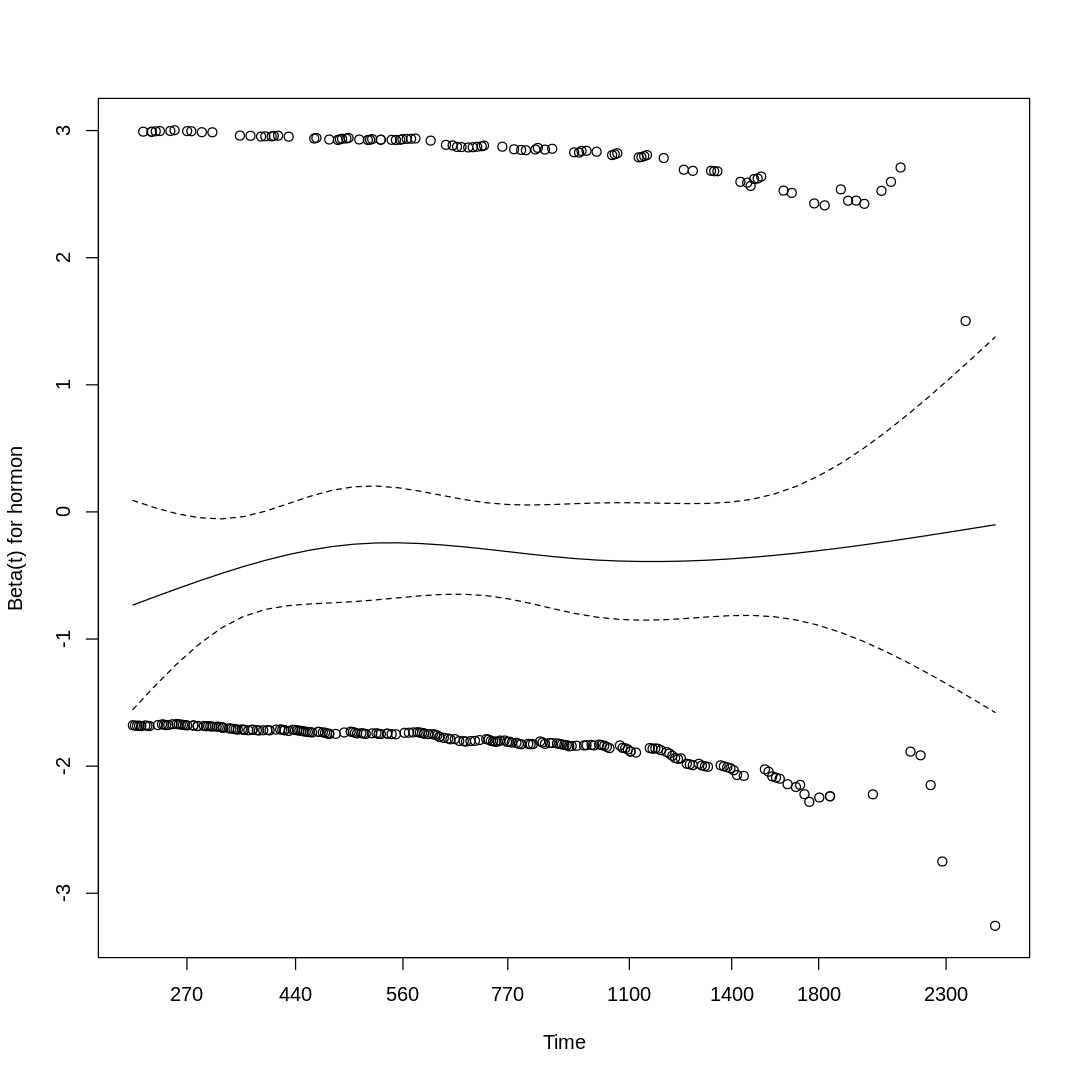

In [ ]:
# Proportional hazards test, using Schoenfeld residuals
ph_test <- cox.zph(cox_model)
print(ph_test)

plot(ph_test)

#### About the test:

The test works by examining the correlation between the Schoenfeld residuals and follow-up time. Under the proportional hazards assumption, these residuals should be uncorrelated with time. In our case, the test produces:

- chi-square test statistic: 0.227
- degrees of freedom: 1
- p-value for the test: 0.63

Why use it in this case:

- It is specifically designed to assess the proportional hazards assumption.
- It is widely accepted as the standard method for this purpose in survival analysis.
- It provides both numerical results and graphical visualization of potential violations.
- It can detect time-varying effects, which are particularly important in long-term treatment studies.

#### How exactly it tests the proportional hazards:


When we fit a Cox model such as ours:
$$
\lambda(t|h_i) = \lambda_0(t) \exp(h_i \beta),
$$
we are assuming that the coefficient $\beta$ is constant over time. If this assumption holds, the log hazard ratio between the treatment groups remains constant regardless of when we measure it.

Schoenfeld residuals represent the difference between the observed covariate value (hormon 0 or 1 in our case) and its expected value at each failure time, weighted by the estimated risk set. For the $j$-th failure time and the hormonal treatment covariate, the Schoenfeld residual is calculated as:      
$$
r_j = h_j - \frac{\sum_{i \in R_j} h_i \exp(h_i \beta)}{\sum_{i \in R_j} \exp(h_i \beta)},
$$

where $R_j$​ is the risk set at time $j$ (i.e. individuals still at risk just before time $j$).

If the proportional hazards assumption holds true, these residuals should show no systematic pattern over time.       
The test formalizes this by looking for a correlation between the residuals and transformed time. A significant correlation indicates non-proportionality, meaning the treatment effect changes over time, violating the model's core assumption.

#### Interpretation of the findings:

Since the test results show a p-value = 0.63 > 0.05, we can conclude that there is no significant evidence against the proportional hazards assumption, supporting the validity of our Cox model. If the p-value were to be < 0.05, we would have evidence that the effect of hormonal treatment varies over time, which would require us to consider more complex models that can account for time-varying effects.

The plots also supports these conclusions. We can see:
- the y-axis showing the scaled Schoenfeld residuals for the hormonal treatment variable,
- the x-axis showing follow-up days,
- the solid line, which represents a smoothed estimate of how the coefficient (log hazard ratio) changes over time,
- the dotted lines representing confidence bands around this estimate,
- the scattered points representing the actual residuals for each individual event (breast cancer recurrence) in the dataset.

The solid line remains relatively flat and within the confidence bands throughout most of the follow-up period. This indicates that the effect of hormonal treatment doesn't significantly change over time. If the proportional hazards assumption were violated, we would see a clear upward or downward trend in the line and/or the residuals.

### 4. Provide a plot to graphically evaluate whether there is evidence for proportional hazards. Motivate your choice of method, and describe the method and the results of the evaluation.

I believe the Schoenfeld residuals plot from the previous exercise, its description and the description of the results already answer this question as well.

## F: Analysis plan for a randomised controlled trial (5 marks)

### 1. Write an outline of how to analyse this study. The outline should include: the estimand of interest; the estimator for that estimand; how you will assess potential confounding; how you will model for potential confounding; whether and how to assess for proportional hazards; and a description of the tables and figures used for reporting. Your analysis plan should provide some motivation for your choices.

#### The estimand of interest

The estimand would be the cause-specific hazard ratio (HR), comparing the risk of death due to colorectal cancer over five years between experimental arm (low-dose aspirin) and the control arm (no low-dose aspirin).

Motivation:      
Cause-specific death directly addresses the research question about survival improvement and the hazard ratio provides a clinically interpretable measure of the relative risk of death between the two treatment groups over time.

#### The estimator for that estimand

To estimate the HR, a Cox proportional hazards model would be used.

Motivation:    
The Cox model is appropriate because it handles time-to-event data with censoring (patients who don't experience the event during follow-up), which is expected in a 5-year survival study. It's the standard approach for analyzing survival outcomes in clinical trials.

#### How to assess potential confounding

We would identify potential confounders that may need adjustment by comparing the baseline characteristics (among well-known prognostic factors that we have accessible in the data, for example these could include age, sex, cancer stage, tumor location, previous treatments, etc.) between arms using statistical tests (e.g. t-tests for continuous variables, chi-square for categorical data) and looking for any covariates with clinically meaningful imbalances.

Motivation:    
Even with randomization, chance imbalances can occur. Assessing baseline characteristics helps to verify the success of the randomization.

#### How to model for potential confounding

We would run two models:
1. Unadjusted model (i.e., adjusted for hormonal treatment only, for reference).
2. Adjusted model including all important covariates - the imbalanced ones among previously assessed.                  

Motivation:    
Adjusted model should preserve randomization benefits while improving efficiency. By comparing e.g., the AUC between this and the unadjusted model we would be able to justify the selection of the additional covariates.

#### Whether and how to assess for proportional hazards

We could use Schoenfeld residuals test to assess correlation between residuals and time.

Motivation:          
The Cox model assumes proportional hazards. Violation of this assumption could lead to biased results and incorrect conclusions about treatment efficacy. If PH were to be violated, then we would use a stratified Cox model, time-varying coefficients, or switch to an accelerated failure time model.

#### Description of the tables and figures used for reporting

For example:
1. Table with baseline characteristics by treatment arm, with p-values or standardized differences.
2. Table with HR results, 95% confidence interval, and p-value from the Cox model.
3. Figure with Kaplan-Meier curves for cause-specific survival by treatment arm.
4. Figure from Schoenfeld residuals test.


Motivation:    
Such tables and figures provide both visual and numerical summaries of the resuts, as well a minimal support for the choices made by potentially showing their corectness.



### 2. Finally, discuss whether non-collapsibility is an issue for the chosen estimator.

Non-collapsibility is a concern for the Cox model's HR if covariates are adjusted for. The HR is a conditional measure, meaning its value depends on covariates included in the model, even if those covariates are not confounders. For example, adjusting for a balanced prognostic factor in a Randomised Controlled Trial (RCT) may change the HR estimate purely due to non-collapsibility, not confounding.

However, in the primary unadjusted analysis (typical for RCTs), the HR is marginal and collapsible, avoiding this issue. If adjustment is necessary (e.g., for imbalanced factors, as discussed above), the conditional HR remains valid but must be interpreted as conditional on covariates. Non-collapsibility does not bias the estimator, however it does complicate direct comparisons with unadjusted estimates.

# Acknowledgement of the use of generative AI

During the preparation of this work, Claude 3.7 Sonnet (Anthropic, https://claude.ai/) and DeepSeek-R1 (DeepSeek, https://chat.deepseek.com/) were used to:
- recall, explain and discuss the relevant concepts in survival analysis and calculus,
- rephrase some paragraphs and refine LaTeX code, mostly ensuring consistency in notation, without substantial changes to the underlying meaning,
- provide examples on the use of R programming language.

The generated content was being continuously reviewed and extensively edited throughout the writing process according to the author's knowledge and understanding of the topics.
The author takes full responsibility for the accuracy, integrity, and originality of the final work.

The generative AI was not used to make any of the final decisions on the approach to solve any of the tasks, nor was it used in any of the explanations and interpretations of the specific results.